<a href="https://colab.research.google.com/github/gorantlasuhas/git_new/blob/main/MLLAB13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

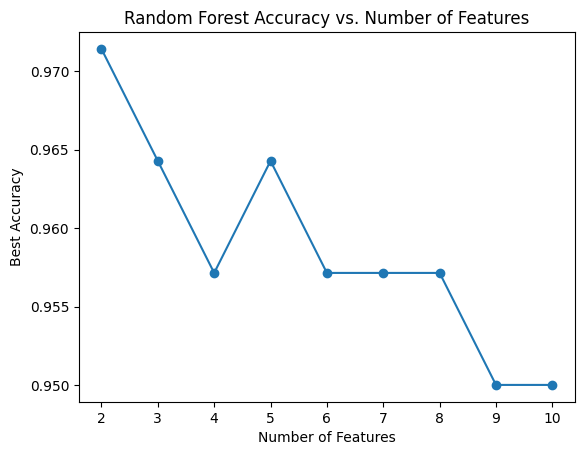

Feature Importance from OOB Samples:
[0.06776511 0.25191109 0.22565763 0.04244477 0.0825582  0.13949575
 0.0990278  0.08295486 0.00818479]

Mutual Information Values:
[0.2907442  0.37781224 0.40987641 0.28593015 0.34337251 0.00167014
 0.35568304 0.25648021 0.13140311]

Correlation between Feature Importance and Mutual Information: 0.39120164271744334


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Step 1: Download the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
         "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
         "Normal Nucleoli", "Mitoses", "Class"]
df = pd.read_csv(url, names=names)

# Drop missing values
df.replace('?', -99999, inplace=True)
df.drop(['Sample code number'], axis=1, inplace=True)

# Convert the data to numerical values
df = df.apply(pd.to_numeric)

# Separate features and target variable
X = df.drop("Class", axis=1)
y = df["Class"]

# Step 2-5: Build Random Forest with varying number of features
max_features_list = range(2, 11)
num_trees_list = [100, 200, 250, 300, 350]
best_accuracies = []

for max_features in max_features_list:
    accuracies = []

    for num_trees in num_trees_list:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Build Random Forest model
        clf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, oob_score=True, random_state=42)
        clf.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Find the best accuracy for the current number of features
    best_accuracy = max(accuracies)
    best_accuracies.append(best_accuracy)

# Plot the graph of best accuracy versus number of features
plt.plot(max_features_list, best_accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Best Accuracy')
plt.title('Random Forest Accuracy vs. Number of Features')
plt.show()

# Step 6: Find the optimal number of features
optimal_num_features = max_features_list[best_accuracies.index(max(best_accuracies))]

# Step 7: Find the importance of each feature using OOB samples
clf = RandomForestClassifier(n_estimators=100, max_features=optimal_num_features, oob_score=True, random_state=42)
clf.fit(X, y)
feature_importances = clf.feature_importances_

# Step 8: Find the mutual information values of all features
mi_values = mutual_info_classif(X, y)

# Compare the results
print("Feature Importance from OOB Samples:")
print(feature_importances)
print("\nMutual Information Values:")
print(mi_values)

# Check if the two lists are strongly correlated
correlation = pd.Series(feature_importances).corr(pd.Series(mi_values))
print("\nCorrelation between Feature Importance and Mutual Information:", correlation)
